# Hypothesis testing

A hypothesis test usually says something about the relationship between two data sets (one of which may be theoretical). The null hypothesis is that there is no relationship, while the alternative hypothesis states the nature of the postulated relationship. The "p-value" is the probability of observing results at least as extreme as the data if the null hypothesis is true. The concept of hypothesis testing is quite subtle and I leave it to the statistical lectures to explain in detail. Here, we assume that you know and can justify what test you wish to apply, and simply show how it can be done in R.

We will focus on the most common hypothesis test - two-sample comparisons. Parametric and non-parametric significance tests for categorical/categorical, categorical/continuous and continuous/continuous variables are shown.

In [5]:
suppressMessages(library(vcd))
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))

In [19]:
head(Arthritis)

  ID Treatment  Sex Age Improved
1 57   Treated Male  27     Some
2 46   Treated Male  29     None
3 77   Treated Male  30     None
4 17   Treated Male  32   Marked
5 36   Treated Male  46   Marked
6 23   Treated Male  58   Marked

In [21]:
summary(Arthritis)

       ID          Treatment      Sex          Age          Improved 
 Min.   : 1.00   Placebo:43   Female:59   Min.   :23.00   None  :42  
 1st Qu.:21.75   Treated:41   Male  :25   1st Qu.:46.00   Some  :14  
 Median :42.50                            Median :57.00   Marked:28  
 Mean   :42.50                            Mean   :53.36              
 3rd Qu.:63.25                            3rd Qu.:63.00              
 Max.   :84.00                            Max.   :74.00              

## Two group comparisons

### Categorical/Categorical

Create a $2 \times 2$ table of counts of Sex by Treatment. Is one sex more likely to get assigned to Placebo than the other?

In [38]:
df <- Arthritis %>% count(Treatment, Sex) %>% spread(Sex, n)
df

Treatment Female Male
1   Placebo     32   11
2   Treated     27   14

In [35]:
chisq.test(df[,2:3])


	Pearson's Chi-squared test with Yates' continuity correction

data:  df[, 2:3]
X-squared = 0.38378, df = 1, p-value = 0.5356


In [40]:
fisher.test(df[,2:3])


	Fisher's Exact Test for Count Data

data:  df[, 2:3]
p-value = 0.4763
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.5320442 4.3286798
sample estimates:
odds ratio 
  1.500984 


### Work

**1**. Is there evidence that treatment is different from placebo?

## Categorical/Continuous

In [53]:
sleep

extra group ID
1    0.7     1  1
2   -1.6     1  2
3   -0.2     1  3
4   -1.2     1  4
5   -0.1     1  5
6    3.4     1  6
7    3.7     1  7
8    0.8     1  8
9    0.0     1  9
10   2.0     1 10
11   1.9     2  1
12   0.8     2  2
13   1.1     2  3
14   0.1     2  4
15  -0.1     2  5
16   4.4     2  6
17   5.5     2  7
18   1.6     2  8
19   4.6     2  9
20   3.4     2 10

In [52]:
summary(sleep)

     extra        group        ID   
 Min.   :-1.600   1:10   1      :2  
 1st Qu.:-0.025   2:10   2      :2  
 Median : 0.950          3      :2  
 Mean   : 1.540          4      :2  
 3rd Qu.: 3.400          5      :2  
 Max.   : 5.500          6      :2  
                         (Other):8  

Is there evidence that the `extra` values are not the same in groups 1 and 2?

In [57]:
options(repr.plot.width=6, repr.plot.height=4)

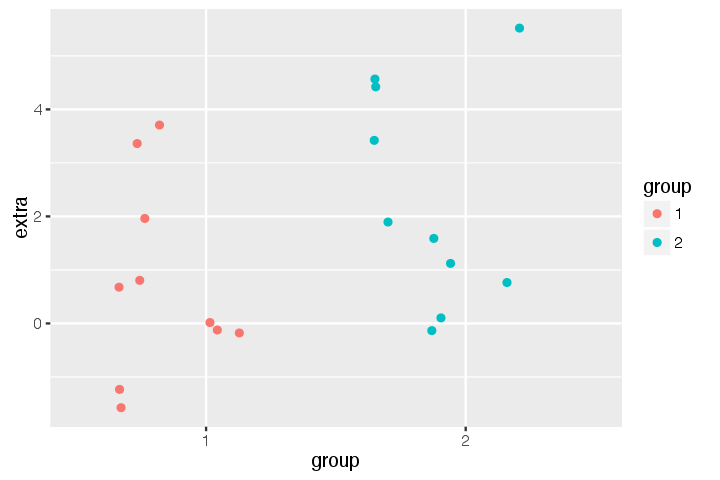

In [58]:
ggplot(sleep, aes(x=group, y=extra, color=group)) + geom_jitter()

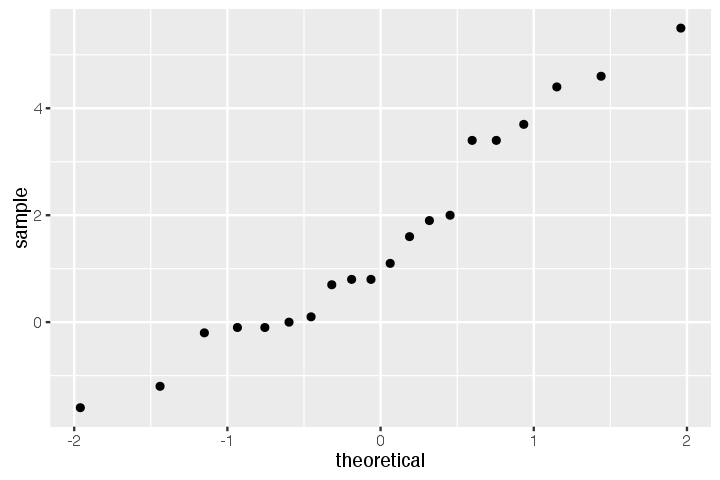

In [63]:
ggplot(sleep, aes(sample=extra)) + stat_qq()

### Independent two-sample t-test

#### Student t-test

In [69]:
t.test(extra ~ group, sleep, var.equal = TRUE)


	Two Sample t-test

data:  extra by group
t = -1.8608, df = 18, p-value = 0.07919
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.363874  0.203874
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


#### Welch t-test (does not assume same variabce across groups)

In [70]:
t.test(extra ~ group, sleep)


	Welch Two Sample t-test

data:  extra by group
t = -1.8608, df = 17.776, p-value = 0.07939
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.3654832  0.2054832
sample estimates:
mean in group 1 mean in group 2 
           0.75            2.33 


### Paired t-test

We notice that the same subjects participated in Group 1 and Group 2. We can take advantage of this fact to run paired t-tests, which is equivalent to testing if the difference between pairs is zero or not.

In [84]:
diff <- sleep %>% spread(group, extra) %>% transmute(diff = .$"1" - .$"2")
diff

diff
1  -1.2
2  -2.4
3  -1.3
4  -1.3
5   0.0
6  -1.0
7  -1.8
8  -0.8
9  -4.6
10 -1.4

In [85]:
t.test(diff, mu=0)


	One Sample t-test

data:  diff
t = -4.0621, df = 9, p-value = 0.002833
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.4598858 -0.7001142
sample estimates:
mean of x 
    -1.58 


### Work

**2**. Use the stduent t-test to see if the values of extra in group 1 is **less than** the value in group 2.

**3**. Use the non-parametric version of the independent and paired sample t-tests (`wilcox.test`) to calculate the p-value.

### Continuous/Continuous

In [1]:
head(mtcars)

mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2
Valiant           18.1   6  225 105 2.76 3.460 20.22  1  0    3    1

Is `mpg` correlated with `wt`?

In [7]:
options(repr.plot.width=4, repr.plot.height=3)

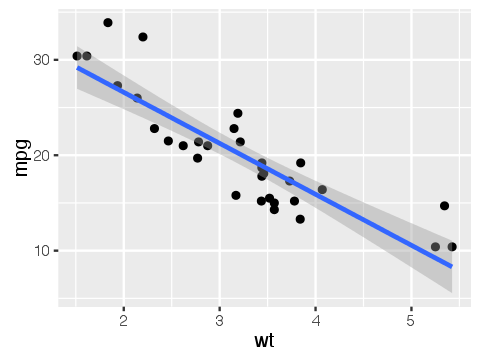

In [10]:
ggplot(mtcars, aes(wt, mpg)) + geom_point() + geom_smooth(method=lm)

In [11]:
cor(mtcars %>% select(wt, mpg))

wt        mpg
wt   1.0000000 -0.8676594
mpg -0.8676594  1.0000000

### Tests of correlation

In [17]:
# Parametric test for a linear relatinoship
cor.test(mtcars$wt, mtcars$mpg, method="pearson")


	Pearson's product-moment correlation

data:  mtcars$wt and mtcars$mpg
t = -9.559, df = 30, p-value = 1.294e-10
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.9338264 -0.7440872
sample estimates:
       cor 
-0.8676594 


In [18]:
# Non-parametric comparison of ranks
cor.test(mtcars$wt, mtcars$mpg, method="spearman")

Warning message:
In cor.test.default(mtcars$wt, mtcars$mpg, method = "spearman"): Cannot compute exact p-value with ties


	Spearman's rank correlation rho

data:  mtcars$wt and mtcars$mpg
S = 10292, p-value = 1.488e-11
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
-0.886422 


### Simple linear regression

An alternative way to do this is with simple linear regression, which means fitting a straight line to the data. Note that the p-value given by linear regression and the Pearson correlation test is identical. We will see many examples of regression and the use of R formula in the rest of the course.

In [25]:
fit <- lm(mpg ~ wt, mtcars)

In [26]:
summary(fit)


Call:
lm(formula = mpg ~ wt, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5432 -2.3647 -0.1252  1.4096  6.8727 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  37.2851     1.8776  19.858  < 2e-16 ***
wt           -5.3445     0.5591  -9.559 1.29e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.046 on 30 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7446 
F-statistic: 91.38 on 1 and 30 DF,  p-value: 1.294e-10
